In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
! pip install mlxtend


In [14]:
purchase_data=pd.read_csv(r"/workspace/Projects/Customer_Purchase_Analysis/shopping_trends.csv")
purchase_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [15]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [22]:
purchase_data[["Age","Purchase Amount (USD)","Review Rating", "Previous Purchases"]].describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [27]:
print("Looking for null values:")
purchase_data.isnull().sum()


Looking for null values:


Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [38]:
print("Sales By Category:")
sales_grouped= purchase_data.groupby("Category")["Purchase Amount (USD)"].agg(['sum', 'count', 'mean'])
sales_grouped

Sales By Category:


,sum,count,mean
Category,,,
Accessories,74200,1240,59.838710
Clothing,104264,1737,60.025331
Footwear,36093,599,60.255426
Outerwear,18524,324,57.172840


In [40]:
print("Top Selling Products:")
top_products = purchase_data.groupby('Item Purchased')['Purchase Amount (USD)'].agg(['sum', 'count']).sort_values('sum', ascending=False)
top_products.sample(4)

Top Selling Products:


,sum,count
Item Purchased,,
Scarf,9561,157
Gloves,8477,140
Dress,10320,166
Sweater,9462,164


In [44]:
from datetime import datetime, timedelta

end_date = datetime(2025, 5, 11) 
start_date = end_date - timedelta(days=90)
transaction_dates = [start_date + (end_date - start_date) * np.random.random() for _ in range(len(purchase_data))]
purchase_data['Transaction_Date'] = transaction_dates

In [51]:
# Sales trends over time
purchase_data['Month_Day'] = purchase_data['Transaction_Date'].dt.strftime('%m-%d')
monthly_sales = purchase_data.groupby('Month_Day')['Purchase Amount (USD)'].sum().reset_index()
monthly_sales


,Month_Day,Purchase Amount (USD)
0,02-10,2243
1,02-11,2546
2,02-12,2487
3,02-13,2610
4,02-14,2366
...,...,...
85,05-06,3204
86,05-07,2608
87,05-08,2279
88,05-09,2183


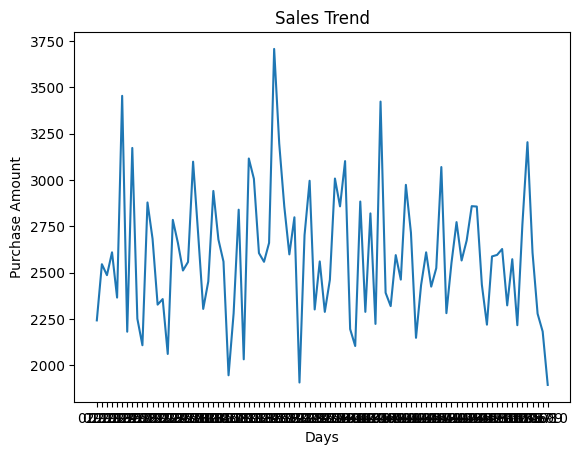

In [54]:
plt.plot(monthly_sales["Month_Day"],monthly_sales["Purchase Amount (USD)"])
plt.xlabel("Days")
plt.ylabel("Purchase Amount")
plt.title("Sales Trend")
plt.show()

In [58]:
# Customer segmentation by purchase frequency and amount
purchase_data['Purchase_Segment'] = pd.qcut(purchase_data['Purchase Amount (USD)'], 3, labels=['Low', 'Medium', 'High'])
customer_segments = purchase_data.groupby(['Purchase_Segment', 'Frequency of Purchases']).size().unstack(fill_value=0)
print("\nCustomer Segments by Purchase Amount and Frequency:")
customer_segments


Customer Segments by Purchase Amount and Frequency:


/tmp/ipykernel_7825/1926125344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_segments = purchase_data.groupby(['Purchase_Segment', 'Frequency of Purchases']).size().unstack(fill_value=0)


Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Purchase_Segment,,,,,,,
Low,191,166,192,186,180,195,190
Medium,190,184,191,194,192,176,176
High,191,197,201,162,181,192,173


In [62]:
purchase_matrix = pd.crosstab(purchase_data['Customer ID'], purchase_data['Item Purchased'])
# Using Apriori algorithm
frequent_itemsets = apriori(purchase_matrix, min_support=0.1, use_colnames=True)

/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    print("Association Rules (customers who bought X also bought Y):")
    if not rules.empty:
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())
    else:
        print("No strong association rules found with current thresholds.")
else:
    print("No frequent itemsets found with current support threshold.")

In [ ]:
# Approach 2: Category-based recommendations
def get_category_recommendations(category, purchase_data, n=3):
    """Get top n products from a specific category based on purchase count"""
    category_products = purchase_data[purchase_data['Category'] == category]
    top_products = category_products.groupby('Item_Purchased')['Purchase_Amount'].count().sort_values(ascending=False)
    return top_products.head(n).index.tolist()

In [ ]:
# Approach 3: Customer segmentation-based recommendations
def get_segment_recommendations(age, gender, purchase_amount, purchase_data, n=3):
    """Get recommendations based on demographic and purchase segmentation"""
    # Find similar customers
    age_range = (age - 10, age + 10)
    segment = pd.qcut([purchase_amount], 3, labels=['Low', 'Medium', 'High'])[0]
    
    similar_customers = purchase_data[
        (purchase_data['Age'] >= age_range[0]) & 
        (purchase_data['Age'] <= age_range[1]) & 
        (purchase_data['Gender'] == gender) &
        (purchase_data['Purchase_Segment'] == segment)
    ]
    
    if len(similar_customers) < 3:
        # Fall back to just gender and segment if too restrictive
        similar_customers = purchase_data[
            (purchase_data['Gender'] == gender) &
            (purchase_data['Purchase_Segment'] == segment)
        ]
    
    recommendations = similar_customers['Item_Purchased'].value_counts().head(n).index.tolist()
    return recommendations

In [ ]:
print("\nExample Recommendations:")
customer_idx = 5  # Sample customer
customer = purchase_data.iloc[customer_idx]
print(f"For Customer {customer['Customer_ID']} who purchased {customer['Item_Purchased']}:")

In [ ]:
# Category recommendations
cat_recommendations = get_category_recommendations(customer['Category'], purchase_data)
print(f"Category-based recommendations: {cat_recommendations}")

# Demographic segment recommendations
seg_recommendations = get_segment_recommendations(
    customer['Age'], customer['Gender'], customer['Purchase_Amount'], purchase_data
)
print(f"Segment-based recommendations: {seg_recommendations}")

In [ ]:
plt.figure(figsize=(15, 10))

# Plot 1: Top Products by Revenue
plt.subplot(2, 2, 1)
top_products['sum'].head(5).plot(kind='bar')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue (USD)')

# Plot 2: Purchase Amount Distribution
plt.subplot(2, 2, 2)
sns.histplot(purchase_data['Purchase_Amount'], bins=10)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')

# Plot 3: Sales by Category
plt.subplot(2, 2, 3)
category_sales['sum'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Category')
plt.ylabel('')

# Plot 4: Average Review Rating by Product
plt.subplot(2, 2, 4)
avg_ratings = df.groupby('Item_Purchased')['Review_Rating'].mean().sort_values(ascending=False).head(5)
avg_ratings.plot(kind='bar')
plt.title('Top 5 Products by Average Rating')
plt.xlabel('Product')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.savefig('purchase_analysis_visualizations.png')
plt.close()

print("\nData analysis complete and visualizations saved.")


